In [2]:
%matplotlib inline

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from __future__ import division

In [4]:
Num_cells=5000
tenx=16 # number of lanes in a 10X kit
Reads_cell=50000
kit_price=20000
rarity=np.array([1,.5,.1,.05,.01,.005,.001,.0005,.0001,.00005,.00001]) #hardcode different rariety fractions

cost_BC=0.16*80 #plate oligo syntheis cost per base (IDT) * primer length
cost_BC2=1 #assumed price for oligo synthesis
cost_mil=11 #NextSeq cost per million reads

In [9]:
lib_prep=kit_price/(Num_cells*tenx)

# cost for sequencing to identify cell of a given rarity
seq_cost=[cost_mil*Reads_cell/(1e6*x) for x in rarity] 
# cost for enriched data
enrich_cost=[cost_BC+cost_mil*Reads_cell/(1e8*x)+cost_mil*Reads_cell/(10*1e6*x) for x in rarity]
enrich_cost2=[cost_BC+cost_mil*Reads_cell/(1e8*x)+cost_mil*Reads_cell/(50*1e6*x) for x in rarity]
enrich_cost3=[(1+cost_mil*Reads_cell/(1e8*x)+cost_mil*Reads_cell/(50*1e6*x)) for x in rarity]


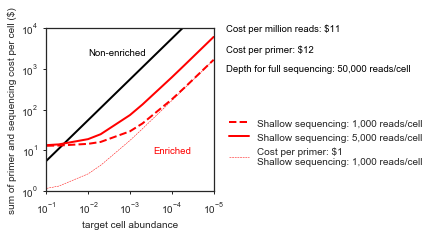

In [16]:
fig,ax=plt.subplots(figsize=(3.,3.))#2.5,2.5
sns.set(style='white')
sns.set_context("paper",rc={"lines.linewidth": 2,'axes.labelsize': 10,'text.fontsize': 10,'legend.fontsize': 10,
   'xtick.labelsize': 10,'ytick.labelsize': 10,'text.usetex': False})

plt.plot(rarity,seq_cost,color='k')
plt.plot(rarity,enrich_cost2,color='red',ls='dashed',label='Shallow sequencing: 1,000 reads/cell')
plt.plot(rarity,enrich_cost,color='red',label='Shallow sequencing: 5,000 reads/cell')
plt.plot(rarity,enrich_cost3,color='red',ls='dashed',lw=.5,label='Cost per primer: $1 \nShallow sequencing: 1,000 reads/cell')


plt.legend(bbox_to_anchor=(2.3, .5))
#plt.xticks([.1,.01,.001,.0001,.00001],[.1,.01,.001,.0001,.00001])

#plt.xticks([.00001,.0001,.001,.01,.1,1],[.00001,.0001,.001,.01,.1,1])
ax.loglog()
plt.gca().invert_xaxis()
plt.xlim(.1, .00001)
plt.ylim(1, 10000)

plt.xlabel('target cell abundance')
plt.ylabel('sum of primer and sequencing cost per cell ($)')

plt.tick_params(direction='out',length=3, width=1)
plt.text(2.e-3, 2500,'Non-enriched',horizontalalignment='center',verticalalignment='center',color='k')
plt.text(1e-4, 10,'Enriched',horizontalalignment='center',verticalalignment='center',color='red')

plt.text(5e-6, 10000,'Cost per million reads: $11',horizontalalignment='left',verticalalignment='center',color='k')
plt.text(5e-6, 3000,'Cost per primer: $12',horizontalalignment='left',verticalalignment='center',color='k')
plt.text(5e-6, 1000,'Depth for full sequencing: 50,000 reads/cell',horizontalalignment='left',verticalalignment='center',color='k')


plt.savefig('/Users/nranu/Desktop/SC_enrichment/Manucript/Figures/Supplemental/Cost_analysis.pdf',transparent=True, bbox_inches='tight')